In [28]:
import pandas as pd
%matplotlib inline

In [38]:
def load_data(file_path):
    return pd.read_csv(file_path, sep=r'\s*,\s*', header=0, engine='python', error_bad_lines=False)
books = load_data("books.csv").set_index("bookID")

Skipping line 3350: Expected 12 fields in line 3350, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 4704: Expected 12 fields in line 4704, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 5879: Expected 12 fields in line 5879, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 8981: Expected 12 fields in line 8981, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.


In [49]:
# Split data for training
books_train = training.iloc[:-10000]
oot_df = training.iloc[-10000:]
oot_df.shape,train_df.shape
train_df = train_df.drop('Timestamp',axis=1)
train_labels = train_df["ETA"]
train_df = train_df.drop('ETA',axis=1)

In [39]:
books.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [40]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   isbn                11123 non-null  object 
 4   isbn13              11123 non-null  int64  
 5   language_code       11123 non-null  object 
 6   num_pages           11123 non-null  int64  
 7   ratings_count       11123 non-null  int64  
 8   text_reviews_count  11123 non-null  int64  
 9   publication_date    11123 non-null  object 
 10  publisher           11123 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [41]:
books.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


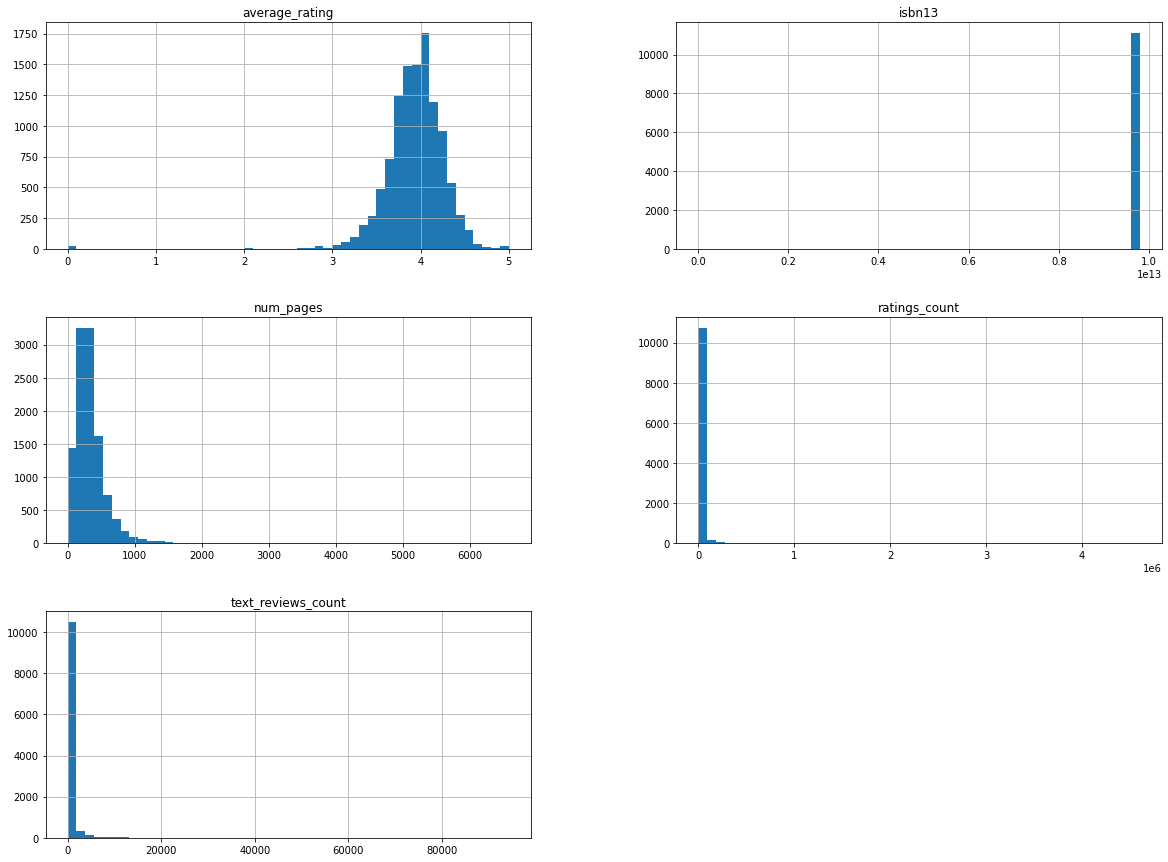

In [42]:
import matplotlib.pyplot as plt
books.hist(bins=50, figsize=(20,15))
#weather.hist(bins=50, figsize=(20,15))
plt.show()

In [43]:
books["num_pages"]

bookID
1         652
2         870
4         352
5         435
8        2690
         ... 
45631     512
45633     635
45634     415
45639     434
45641     272
Name: num_pages, Length: 11123, dtype: int64

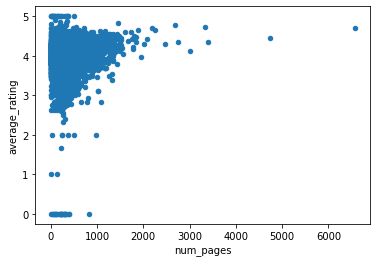

In [44]:
books.plot(kind="scatter", x="num_pages", y="average_rating")#, alpha=0.1, s=AVG_speed, label="Speed", figsize=(10,7), c=trips["ETA"], cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

In [45]:
corr_matrix = books.corr()
corr_matrix

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
average_rating,1.000000,-0.001965,0.150477,0.038224,0.033663
isbn13,-0.001965,1.000000,-0.009818,0.005494,0.008152
num_pages,0.150477,-0.009818,1.000000,0.034337,0.036977
ratings_count,0.038224,0.005494,0.034337,1.000000,0.865977
text_reviews_count,0.033663,0.008152,0.036977,0.865977,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f35352ad0>,
      dtype=object)

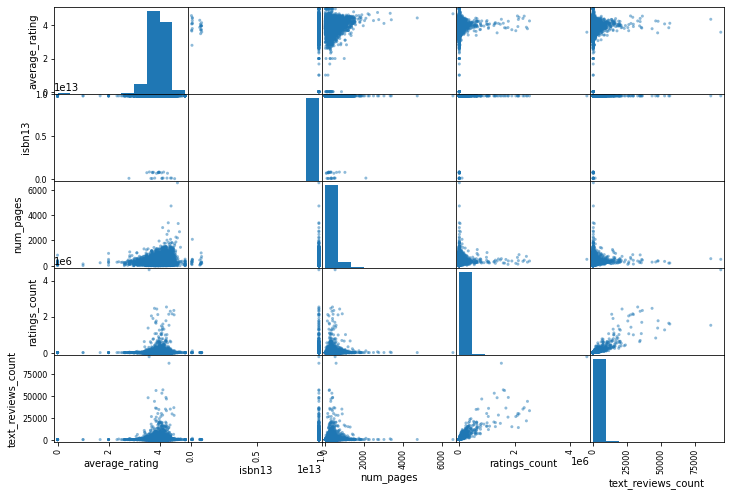

In [47]:
from pandas.plotting import scatter_matrix
attributes = ["average_rating","isbn13","num_pages","ratings_count","text_reviews_count"]
scatter_matrix(books[attributes], figsize=(12,8))

# Training

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_df, train_labels)